# 04: Normal Distributions and Standard ($z$) Scores

**The Normal Curve**, obtained from a mathematical equation, is a theoretical curve defined for a continuous variable and noted for its symmetrical bell-shaped form. The mean, median, and mode of the normal curve is same and is located at the exact midpoint of the curve. 

- The normal curve is defined by the mean($\mu$) and the standard deviation($\sigma$)

- Changing the mean will shift the position of the curve 

- Changing the standard deviation will change the width of the curve 

- Many observed frequency distributions approximate the well-documented normal curve. 

- Generalizations made from larger random samples are more accurate than generalizations made from smaller random samples. 

- The standard normal curve smooths out irregularities within the original distribution that are most likely due to chance, and therefore, generalizations drawn from the normal curve will tend to be more accurate. 


## The Z Score 

- **z Score**: A unit-free, standardized score that, regardless of the original units of measurement, indicates how many standard deviations a score is above or below the mean of its distribution. 

$$
z = \dfrac{X - \mu}{\sigma}
$$

$X$ is the original score, $\mu$ is the population mean, and $\sigma$ is the population standard deviation of the distribution. 

- The positive or negative sign indicates whether the score is above or below the mean. 
- The number indicates the size of deviation from the mean in standard deviation units. 

**To covert from $z$ score to actual value**

$$
X = \mu + z\sigma
$$


In [151]:
def z_score(val, mean, sd):
    return (val - mean)/sd

def target_score(z, mean, sd): 
    return mean + z*sd

## The Standard Normal Curve 

- If the original distribution approximates a normal curve, then the shift to standard or $z$ scores will always produce a new distribution that approximates the standard normal curve. 

- There is only one **Standard Normal Curve** that is tabled and for $z$ scores, with a mean of 0 and a standard deviation of 1. 

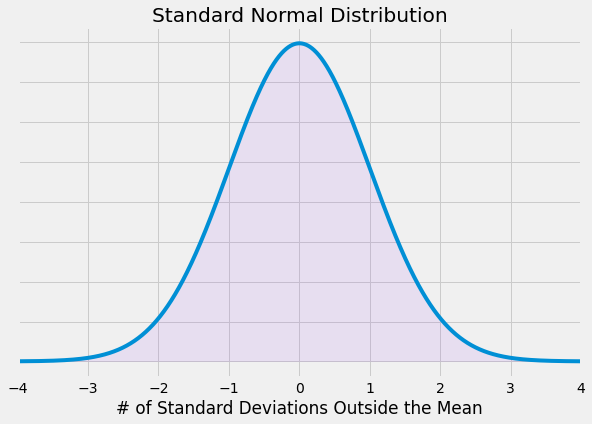

In [152]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

def build_normal_curve(shade_start=-10, shade_end=10, shade2_start=-10, shade2_end=10): 
    """Build the normal curve and the shaded area """

    # Plot shaded area
    x = np.arange(shade_start, shade_end, 0.001)
    x2 = np.arange(shade2_start, shade2_end, 0.001)

    # Plot between -10 and 10 with .001 steps 
    x_all = np.arange(-10, 10, 0.001)

    # Mean = 0, SD = 1. 
    y = norm.pdf(x, 0, 1)
    y2 = norm.pdf(x2, 0, 1)
    y_all = norm.pdf(x_all, 0, 1)

    # build the plot 
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fivethirtyeight')
    ax.plot(x_all, y_all)

    # Create the shaded area 
    if (shade_start > -10 or shade_end < 10):
        ax.fill_between(x,y,0, alpha=0.5, color='#ffe838')

    # Create the second shaded region 
    if (shade2_start > -10 or shade2_end < 10): 
        ax.fill_between(x2,y2,0, alpha=0.5, color='#4287f5')

    # Create the unshaded area 
    ax.fill_between(x_all, y_all, 0, alpha=0.1, color='#a142f5')

    # Range of z scores between -4 and 4 
    ax.set_xlim([-4,4])

    ax.set_xlabel('# of Standard Deviations Outside the Mean')

    # Standard Normal Distribution does not have y ticks  
    ax.set_yticklabels([])

    ax.set_title('Standard Normal Distribution')

    return ax 

ax = build_normal_curve()
plt.show()

### Two Types of Normal Curve Problems 

1. Use a known score to find an unknown proportion. 
2. Use a known proportion to find an unknown score (or scores). 

- The proportions of the area under a curve can never be negative. 

#### Example 01

Assume that GRE scores approximate a normal curve with a mean of 500 and a standard deviation of 100.

Find proportions that correspond to the following targets: 

1. Less than 400
2. More than 650
3. Less than 700

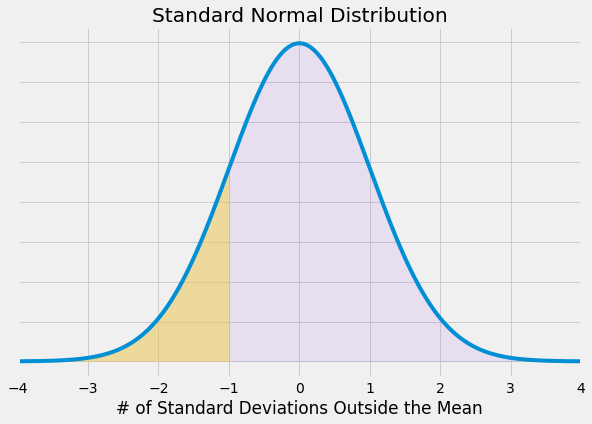

The proportion of students who score less than 400 is 0.1587


In [153]:
mu = 500
sigma = 100 

# 1. Less than 400
z1 = z_score(400, mu, sigma)

ax = build_normal_curve(shade_end=z1)
plt.show()

auc = norm.cdf(z1)
print(f'The proportion of students who score less than 400 is {auc:.4}')

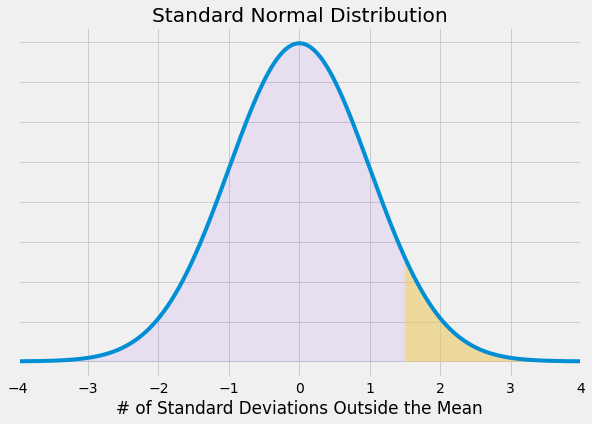

The proportion of students who score more than 650 is 0.06681


In [154]:
# 2. More than 400
z1 = z_score(650, mu, sigma)

ax = build_normal_curve(shade_start=z1)
plt.show()

auc = norm.cdf(z1)
print(f'The proportion of students who score more than 650 is {(1-auc):.4}')

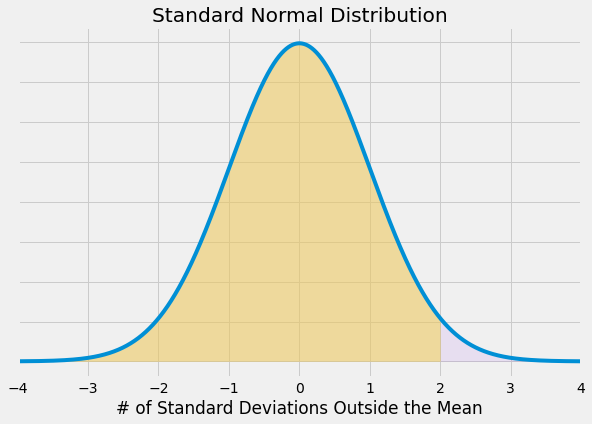

The proportion of students who score less than 700 is 0.9772


In [155]:
# 3. Less than 700
z1 = z_score(700, mu, sigma)

ax = build_normal_curve(shade_end=z1)
plt.show()

auc = norm.cdf(z1)
print(f'The proportion of students who score less than 700 is {(auc):.4}')

#### Example 02

Assume that SAT math scores approximate a normal curve with a mean of 500 and a standard deviation of 100.

Find proportions that correspond to the following targets:

1. More than 570
2. Less than 515 
3. Between 520 and 540
4. Between 470 and 520
5. More than 50 points above the mean 
6. More than 100 points either above or below the mean 
7. Within 50 points either above of below the mean

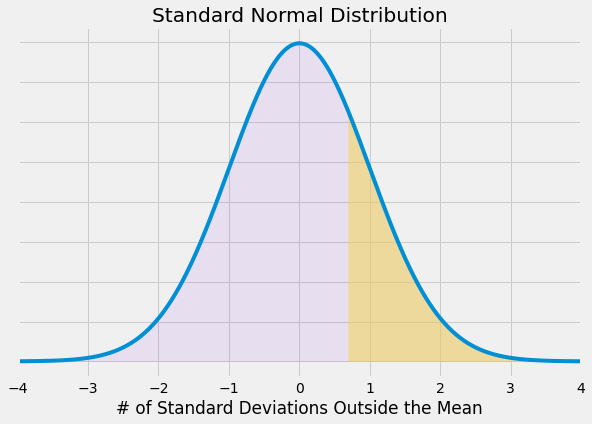

0.242 of students who have scored more than 570. z-score = 0.7


In [156]:
mu = 500
sigma = 100 

# 1. More than 570
z1 = z_score(570, mu, sigma)

ax = build_normal_curve(shade_start=z1)
plt.show()

auc = 1 - norm.cdf(z1)
print(f"{auc:.4} of students who have scored more than 570. z-score = {z1}")

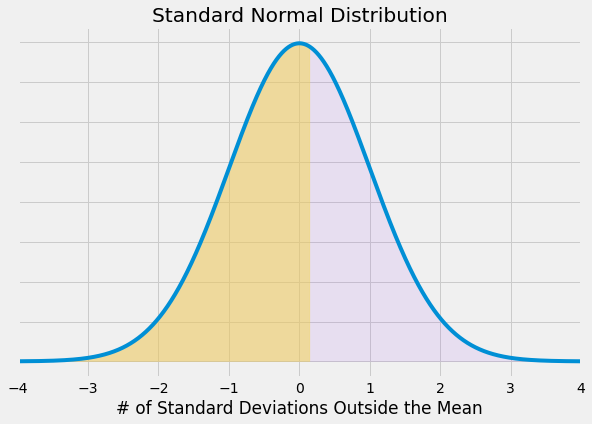

0.5596 of students who have scored less than 515. z-score = 0.15


In [157]:
# 2. Less than 515
z1 = z_score(515, mu, sigma)

ax = build_normal_curve(shade_end=z1)
plt.show()

auc = norm.cdf(z1)
print(f"{auc:.4} of students who have scored less than 515. z-score = {z1}")

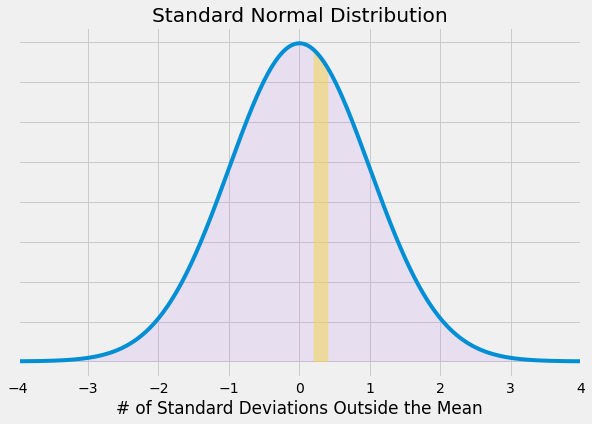

0.07616 of students who have scored between than 520 and 540. z-scores = (0.2, 0.4)


In [158]:
# 3. Between 520 and 540 
z1 = z_score(520, mu, sigma)
z2 = z_score(540, mu, sigma)

ax = build_normal_curve(shade_start=z1, shade_end=z2)
plt.show()

auc = norm.cdf(z2) - norm.cdf(z1)
print(f"{auc:.4} of students who have scored between than 520 and 540. z-scores = {z1, z2}")

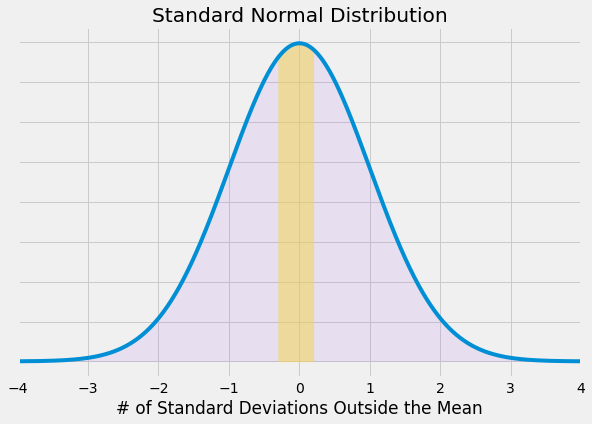

0.1972 of students who have scored between 470 and 520. z-scores = (-0.3, 0.2)


In [159]:
# 4. Between 470 and 520
z1 = z_score(470, mu, sigma)
z2 = z_score(520, mu, sigma)

ax = build_normal_curve(shade_start=z1, shade_end=z2)
plt.show()

auc = norm.cdf(z2) - norm.cdf(z1)
print(f"{auc:.4} of students who have scored between 470 and 520. z-scores = {z1, z2}")

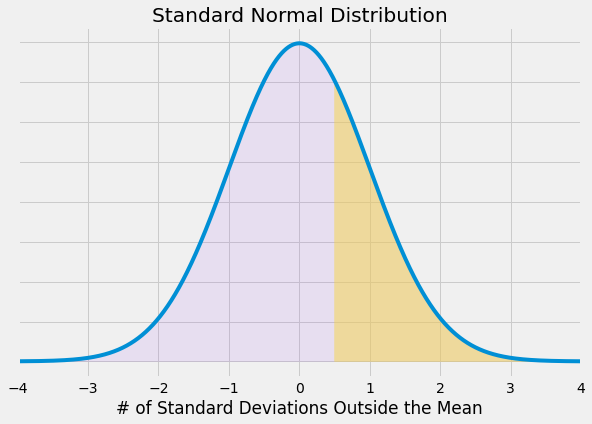

0.3085 of students who have scored 50 points above the mean. z-score = 0.5


In [160]:
# 5. More than 50 points above the mean 

z1 = z_score(mu+50, mu, sigma)

ax = build_normal_curve(shade_start=z1)
plt.show()

auc = 1 - norm.cdf(z1)
print(f"{auc:.4} of students who have scored 50 points above the mean. z-score = {z1}")

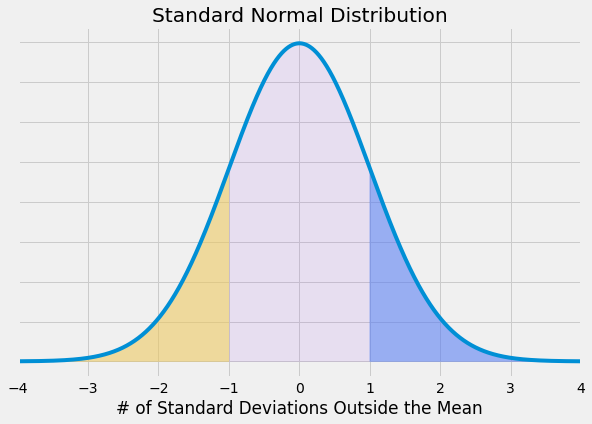

0.1587 of students who have scored 100 points below the mean and 0.1587 of students who have scored 100 points above the mean. z-scores = (-1.0, 1.0)


In [161]:
# 6. More than 100 points either above or below the mean 

z1 = z_score(mu-100, mu, sigma)
z2 = z_score(mu+100, mu, sigma)

ax = build_normal_curve(shade_end=z1, shade2_start=z2)
plt.show()

auc1 = norm.cdf(z1)
auc2 = 1 - norm.cdf(z2)
print(f"{auc1:.4} of students who have scored 100 points below the mean and {auc2:.4} of students who have scored 100 points above the mean. z-scores = {z1, z2}")

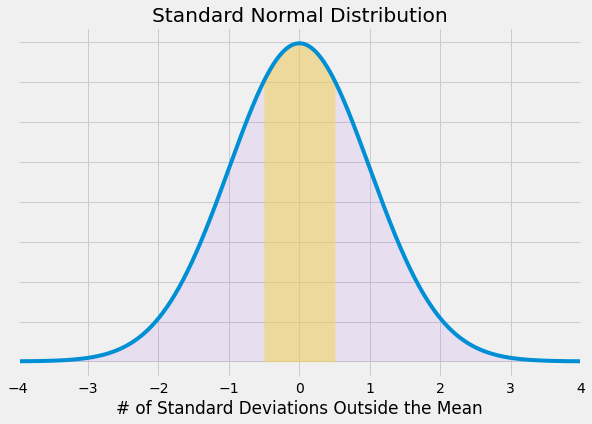

0.3829 of students who have scored 50 points either above or below the mean. z-scores = (-0.5, 0.5)


In [162]:
# 7. Within 50 points either above of below the mean

z1 = z_score(mu-50, mu, sigma)
z2 = z_score(mu+50, mu, sigma)

ax = build_normal_curve(shade_start=z1, shade_end=z2)
plt.show()

auc = norm.cdf(z2) - norm.cdf(z1)
print(f"{auc:.4} of students who have scored 50 points either above or below the mean. z-scores = {z1, z2}")

#### Example 03

Assume that the burning times of electric light bulbs approximate a normal curve with a mean of 1200 hours and a standard deviation of 120 hours. If a large number of new lights are installed at the same time (possibly along a newly opened freeway),at what time will:

1. 1 percent fail?
2. 50 percent fail? 
3. 95 percent fail? 
4. If a new inspection procedure eliminates the weakest 8 percent of all lights before they are marketed, the manufacturer can safely offer customers a money-back guarantee on all lights that fail before _____ hours of burning time.

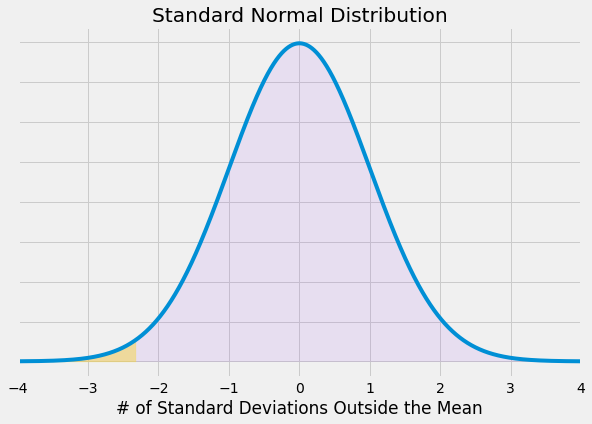

z=-2.326. 1% of all bulbs are likely to fail within 920.8 hours


In [163]:
mu = 1200
sigma = 120 

# 1. 1 percent fail? 
z = norm.ppf(0.01)
ax = build_normal_curve(shade_end=z)
plt.show()

time = target_score(z, mu, sigma)

print(f'z={z:.3f}. 1% of all bulbs are likely to fail within {time:.4} hours')

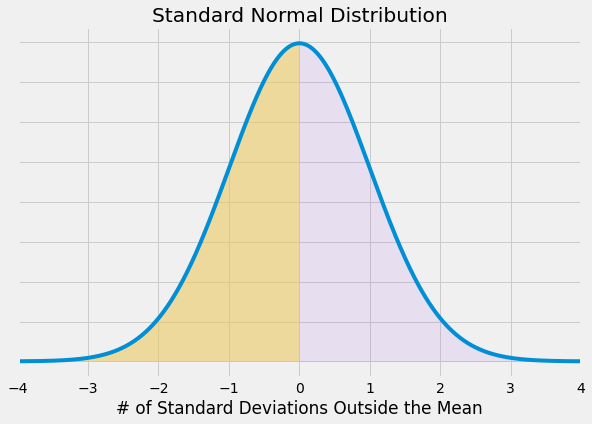

z=0.000. 50% of all bulbs are likely to fail within 1200.000 hours


In [164]:
# 2. 50 percent fail? 
z = norm.ppf(0.5)
ax = build_normal_curve(shade_end=z)
plt.show()

time = target_score(z, mu, sigma)

print(f'z={z:.3f}. 50% of all bulbs are likely to fail within {time:.3f} hours')

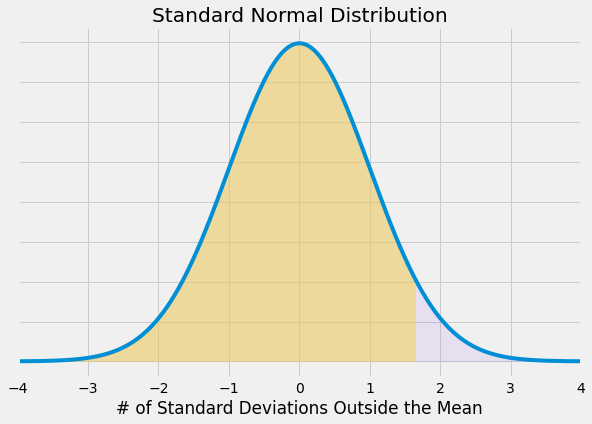

z=1.645. 95% of all bulbs are likely to fail within 1397.382 hours


In [165]:
# 3. 95 percent fail? 
z = norm.ppf(0.95)
ax = build_normal_curve(shade_end=z)
plt.show()

time = target_score(z, mu, sigma)

print(f'z={z:.3f}. 95% of all bulbs are likely to fail within {time:.3f} hours')

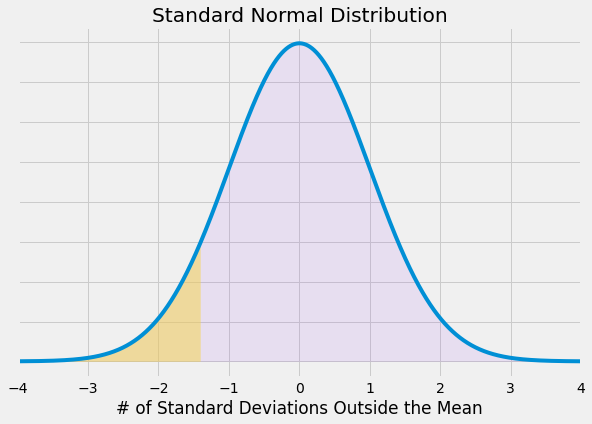

z=-1.405. If a new inspection procedure eliminates the weakest 8 percent of all lights before they are marketed, the manufacturer can safely offer customers a money-back guarantee on all lights that fail before 1031.391 hours of burning time.


In [166]:
# 4. If a new inspection procedure eliminates the weakest 8 percent of all lights before they are marketed, the manufacturer can safely offer customers a money-back guarantee on all lights that fail before _____ hours of burning time.

z = norm.ppf(0.08)
ax = build_normal_curve(shade_end=z)
plt.show()

time = target_score(z, mu, sigma)

print(f'z={z:.3f}. If a new inspection procedure eliminates the weakest 8 percent of all lights before they are marketed, the manufacturer can safely offer customers a money-back guarantee on all lights that fail before {time:.3f} hours of burning time.')

## Transformed Standard Scores 

- **Standard Score** is any unit-free scores expressed relative to a know mean and a known standard deviation. 

- **Transformed Standard Score** is a standard score that, unlike a z score, usually lacks negative signs and decimal points. 

$$
z^ \prime = desired \, mean + (z)(desired \, standard \,deviation)
$$

</br>

When reporting test results, $z$ scores are often transformed into other types of standard scores that lack negative signs and decimal points. 

#### Example 04

An investigator polls common cold sufferers, asking them to estimate the number of hours of physical discomfort caused by their most recent colds. Assume that their
estimates approximate a normal curve with a mean of 83 hours and a standard deviation of 20 hours.

In [167]:
mu = 83
sigma = 20


1.  What is the estimated number of hours for the shortest-suffering 5 percent?

In [168]:
z = norm.ppf(0.05)
x = target_score(z, mu, sigma)
round(x,3)

50.103

2. What proportion of sufferers estimate that their colds lasted longer than 48 hours?

In [169]:
z = z_score(48, mu, sigma)
x = 1 - norm.cdf(z)
round(x,3)

0.96

3. What proportion suffered for fewer than 61 hours?

In [170]:
z = z_score(61, mu, sigma)
x = norm.cdf(z)
round(x, 3)

0.136

4. What is the estimated number of hours suffered by the extreme 1 percent either above or below the mean?

In [171]:
z1 = norm.ppf(0.01)
z2 = norm.ppf(0.99)

x1 = target_score(z1, mu, sigma)
x2 = target_score(z2, mu, sigma)


round(x1, 3), round(x2, 3), round(x1+x2, 3)

(36.473, 129.527, 166.0)

5. What proportion suffered for between 1 and 3 days, that is, between 24 and 72 hours?

In [172]:
z1 = z_score(24, mu, sigma)
z2 = z_score(72, mu, sigma)

x = norm.cdf(z2) - norm.cdf(z1)
round(x, 3)

0.29

6. What is the estimated number of hours suffered by the middle 95 percent?

In [173]:
z1 = norm.ppf(0.025)
z2 = norm.ppf(0.975)

x1 =  target_score(z1, mu, sigma)
x2 = target_score(z2, mu, sigma) 

round(x1, 3), round(x2, 3)

(43.801, 122.199)

7. What proportion suffered for between 2 and 4 days?

In [174]:
z1 = z_score(24*2, mu, sigma)
z2 = z_score(24*4, mu, sigma)

x = norm.cdf(z2) - norm.cdf(z1)

round(x, 3)

0.702

8. A medical researcher wishes to concentrate on the 20 percent who suffered the most. She will work only with those who estimate that they suffered for more than
——— hours. 

In [175]:
z = norm.ppf(0.8)
x = target_score(z, mu, sigma)

round(x, 3)

99.832

9. Another researcher wishes to compare those who suffered least with those who suffered most. If each group is to consist of only the extreme 3 percent, the mild group
will consist of those who suffered for fewer than _____ hours, and the severe group will consist of those who suffered for more than _____ hours.

In [176]:
z1 = norm.ppf(0.03)
x1 = target_score(z1, mu, sigma)

z2 = norm.ppf(0.97)
x2 = target_score(z2, mu, sigma)

round(x1, 3), round(x2, 3)

(45.384, 120.616)

10. Another survey found that people with colds who took daily doses of vitamin C suffered, on the average, for 61 hours. What proportion of the original survey (with a mean
of 83 hours and a standard deviation of 20 hours) suffered for more than 61 hours?

In [177]:
z = z_score(61, mu, sigma)
x = 1 - norm.cdf(z)

round(x, 3)

0.864

11. What proportion of the original survey suffered for exactly 61 hours?

0 since exactly 61 equals 61.0000 etc. to infinity, a point along the base of the normal curve that is associated with no area under the normal curve. 